<a href="https://colab.research.google.com/github/honghyun-kim/Public_test_/blob/main/LG_DeepLearning_1week_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://tinyurl.com/ywzrxpwj

# Table of contents

## 1. Classification(분류): XOR 문제, NOR 문제 실습
## 2. Regression(회귀): Neural Network의 함수 학습 문제
## 3. IRIS 데이터를 활용한 붓꽃 종류 분류 문제

# 실습 환경 구축
### 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 -> GPU로 변경

In [ ]:
!nvidia-smi

### 필요한 라이브러리 로드

In [ ]:
import tensorflow as tf
import numpy as np
import random

import warnings
warnings.filterwarnings('ignore')

### Reproduction을 위한 seed 값 설정

In [ ]:
seed = 42

np.random.seed(seed)
tf.random.set_seed(seed)

# 1. 분류문제: XOR, NOR 실습
## XOR 문제란?
![picture](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F99612E4B5C0B73DD3417CA)

In [ ]:
# XOR data 만들기
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [ ]:
# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 모델 설정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')
model.summary()

![picture](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdnjFEC%2FbtqE14qkUEC%2FJ5J22dRlaMdALVKbBGkefK%2Fimg.png)



In [ ]:
model.fit(x, y, epochs=500, batch_size=1, verbose=0)

model.predict(x).round(4)

In [ ]:
scores = model.evaluate(x, y)
print('모델 정확도:', scores[1] * 100, '%' )

In [ ]:
# 조금 더 깊은 모델 생성
deep_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 모델 설정
deep_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')
deep_model.summary()

In [ ]:
# 모델 학습
deep_model.fit(x, y, epochs=500, batch_size=1, verbose=0)

deep_model.predict(x).round(4)

In [ ]:
scores = model.evaluate(x, y)
print('모델 정확도:', scores[1] * 100, '%' )

## TODO
## 입력값이 3개인 NOR 문제 

![picture](https://oopy.lazyrockets.com/api/v2/notion/image?src=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FQq0wG%2FbtqVbXBQu1F%2FsqKXkbc6seyPkrGQtEPPn0%2Fimg.png&blockId=92d5ed48-5b3c-4691-af91-e905d3ea494d)

### Machine Learning: LogisticRegression으로 문제 풀기

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score

x = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

y = np.array([[0], [0], [1], [0], [1], [0], [1], [0]])

lr_model = LogisticRegression()
lr_model.fit(x,y)
lr_predict = lr_model.predict(x)

print('Logistic Regression 정확도: ',accuracy_score(lr_predict, y).round(4) * 100, '%')

### Deep Learning으로 문제 풀기

In [ ]:
nor_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

nor_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics='accuracy')

nor_model.fit(x, y, epochs = 300, batch_size=1, verbose=0)

In [ ]:
print(nor_model.predict(x).round(1) == y)

In [ ]:
scores = nor_model.evaluate(x, y)
print('모델 정확도:', scores[1] * 100, '%' )

# 2. 회귀문제: Neural Network를 활용한 함수 학습 및 예측
## 문제:
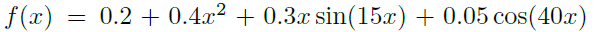
image.png
## Neural Network가 위의 함수에 대해 학습 가능한지 확인.



In [ ]:
# 함수 생성
def func(x):
  y = 0.2 + 0.4 * x**2 + 0.3*x*np.sin(15*x) + 0.05*np.cos(40*x)
  return y

# 학습 데이터 만들기
x = np.linspace(0, 1, 100)
y = func(x)

### 실제 함수 그래프 확인

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(x, y, 'r')

plt.show()

###  모델 학습 및 확인

In [ ]:
# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

# 모델 설정
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(x, y, epochs = 500, verbose=0, batch_size=1)

In [ ]:
# 예측
y_pred = model.predict(x)  # Nerual Network의 예측값

# Plot
fig = plt.figure()
plt.plot(x, y_pred, 'r')
plt.show()

#### 더 큰 학습 데이터셋을 사용하여 훈련

In [ ]:
# 학습 데이터셋 생성
x = np.linspace(0, 1, 500)  # 0~1 사이의 숫자를 500개로 분할
y = func(x)

# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

# 모델 설정
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(x, y, epochs = 500, verbose=0, batch_size=1)

In [ ]:
# x값에 대한 예측값 저장
y_pred = model.predict(x)

# x값에 대한 y값 Plot
fig = plt.figure()
plt.plot(x, y_pred, 'r')
plt.show()

### 모델 성능 확인

In [ ]:
# x값에 대한 y 실제값
# 0, 0.01, 0.02, ... 1 까지의 데이터를 만들고 모델로 예측해보기

x = np.linspace(0, 1, 100)
y = func(x)

# 실제 데이터 Plot
fig = plt.figure()
plt.plot(x, y, 'r')

plt.show()

In [ ]:
# 모델의 예측 데이터 Plot 
y_pred = model.predict(x)

fig = plt.figure()
plt.plot(x, y_pred)
plt.show()

#### 실제값과 예측값 차이

In [ ]:
y_pred = y_pred.reshape(-1, )

y_bias = (y - y_pred)  # 실제값과 예측값의 차이

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y_bias)
plt.show()

### 숙제
### 1. 자신만의 함수를 만들어서 딥러닝을 활용하여 문제를 풀어보세요.
### 2. 실제값과 모델의 예측값에 대해 각각의 그래프를 그려보세요 

# 3. IRIS 데이터를 활용한 붓꽃 종류 분류 문제
![picture](https://static.vecteezy.com/system/resources/previews/000/145/921/non_2x/vector-iris-flower-banner-line-art.jpg)

### 데이터셋 불러오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris['DESCR'])

### 데이터셋 구성

In [ ]:
iris['data'][:5]

In [ ]:
iris['feature_names']

In [ ]:
iris['target_names']

### IRIS 데이터 파일 다운로드 및 불러오기

In [ ]:
!gdown --id 1OY3rIHnQ2PDCWgRvJgv0ojjbxMLr7p_i

import pandas as pd

df = pd.read_csv('Iris.csv')

In [ ]:
df

### 데이터 확인
#### Sepal(꽃받침) 관련 데이터 분포 확인

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

setosa = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-setosa'], y = df['SepalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-versicolor'], y = df['SepalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-virginica'], y = df['SepalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')


data = [setosa, versicolor, virginica]
fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

#### Petal(꽃잎) 데이터 분포 확인

In [ ]:
setosa = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-setosa'], y = df['PetalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-versicolor'], y = df['PetalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-virginica'], y = df['PetalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')
data = [setosa, versicolor, virginica]

fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

### 머신러닝 학습을 위한 데이터셋 분할 및 전처리
#### 학습 및 평가를 위한 훈련 데이터셋과 정답 데이터셋 구성

In [ ]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [ ]:
y

#### 학습을 위해 문자열로 구성된 y값을 숫자 배열 형태로 변환

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y

#### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 42)

### 머신러닝 모델 학습(Logistic Regression, SVC)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print('Logistic Regression 정확도: ',accuracy_score(lr_predict,y_test).round(4) * 100, '%')

In [ ]:
# SVC

svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)

print('SVM 정확도: ',accuracy_score(lr_predict,y_test).round(4) * 100, '%')

### 딥러닝 모델 학습을 위한 전처리

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# 데이터셋 생성

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [ ]:
y

In [ ]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 42)

### 딥러닝 모델 학습

In [ ]:
# shallow 모델 생성
shallow_model = Sequential()
shallow_model.add(Dense(units=4, activation = 'relu', input_dim=4,))
shallow_model.add(Dense(units=10, activation= 'relu'))
shallow_model.add(Dense(units=3, activation= 'softmax'))
shallow_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# shallow 모델 훈련
shallow_history = shallow_model.fit(x_train, y_train, epochs = 300, validation_data = (x_test, y_test))

In [ ]:
# deep 모델 생성
deep_model = Sequential()
deep_model.add(Dense( 4, input_dim=4, activation = 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 3, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# deep 모델 훈련
deep_history = deep_model.fit(x_train, y_train, epochs = 300, validation_data = (x_test, y_test))

In [ ]:
# 정확도 Plot

import matplotlib.pyplot as plt

plt.plot(deep_history.history['accuracy'])
plt.plot(deep_history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Loss값 plot

plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

# Reference
#### XOR문제: https://childult-programmer.tistory.com/46
#### Tensorflow.keras: https://www.tensorflow.org/api_docs/python/tf/keras